In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#общие
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ML 
from sklearn.datasets import load_linnerud
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression #линейная регрессия
from sklearn.ensemble import RandomForestRegressor #случайный лес регрессия
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedKFold 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor  #регрессия на основе метода ближайших соседей
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor 
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score


#metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

sns.set_style('darkgrid')

In [ ]:
!git clone https://github.com/abbat1081/IvashishinTrainModel.git

Cloning into 'IvashishinTrainModel'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [ ]:
data = pd.read_csv('./IvashishinTrainModel/ebw_data.csv')
#check = pd.read_csv('/content/predict.csv')

In [ ]:
data.head()

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


In [ ]:
data.shape

(72, 6)

In [ ]:
data.isna()

,IW,IF,VW,FP,Depth,Width
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
67,False,False,False,False,False,False
68,False,False,False,False,False,False
69,False,False,False,False,False,False
70,False,False,False,False,False,False


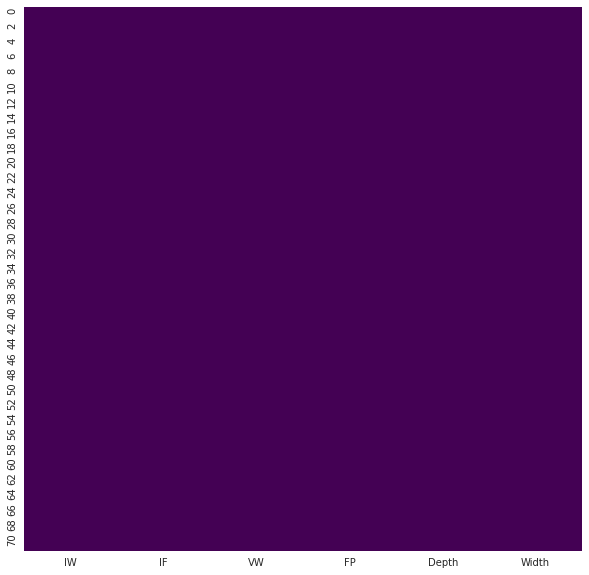

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(data.isna(), cmap = 'viridis', cbar = False)
plt.show()

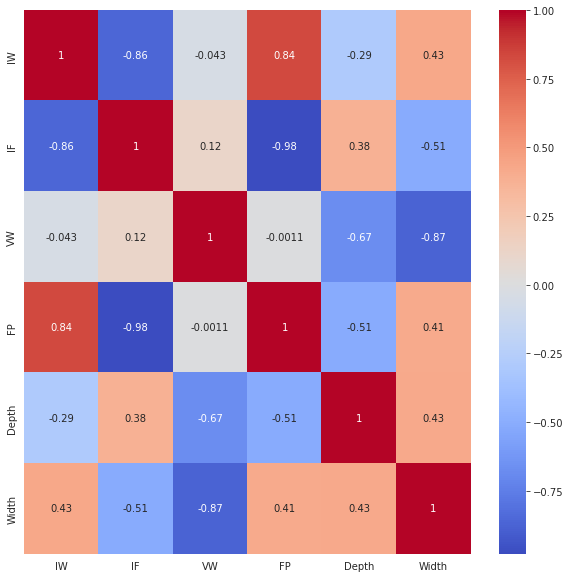

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), cmap = 'coolwarm', annot = True)

In [ ]:
data.describe()

,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


##изучаем целевую переменную

In [ ]:
data['Depth'].value_counts()

1.20    14
1.08     6
1.36     6
1.24     5
1.28     4
1.12     3
0.80     3
0.84     3
1.32     3
1.16     3
1.00     2
0.96     2
1.64     2
0.98     1
0.86     1
1.68     1
1.58     1
1.18     1
1.22     1
1.76     1
0.88     1
1.40     1
1.72     1
1.02     1
0.94     1
0.92     1
1.62     1
1.04     1
1.60     1
Name: Depth, dtype: int64

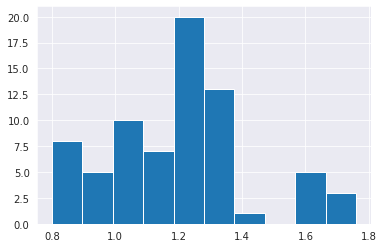

In [ ]:
data['Depth'].hist()

In [ ]:
data['Width'].value_counts()

1.76    12
1.80     8
2.48     5
1.96     4
1.72     4
1.86     4
1.84     4
1.82     4
2.00     3
2.52     3
1.78     3
2.24     2
2.28     2
1.68     2
1.94     2
2.08     1
2.04     1
2.54     1
2.16     1
1.71     1
2.50     1
1.90     1
2.56     1
2.60     1
1.88     1
Name: Width, dtype: int64

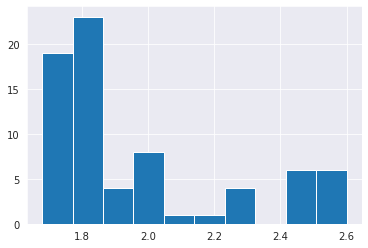

In [ ]:
data['Width'].hist()

In [ ]:
data.head()

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48


In [ ]:
data.head()

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


In [ ]:
data['IW']=(data['IW']-data['IW'].min())/(data['IW'].max()-data['IW'].min())
data['IF']=(data['IF']-data['IF'].min())/(data['IF'].max()-data['IF'].min())
data['VW']=(data['VW']-data['VW'].min())/(data['VW'].max()-data['VW'].min())
data['FP']=(data['FP']-data['FP'].min())/(data['FP'].max()-data['FP'].min())

In [ ]:
data['Depth']=(data['Depth']-data['Depth'].min())/(data['Depth'].max()-data['Depth'].min())
data['Width']=(data['Width']-data['Width'].min())/(data['Width'].max()-data['Width'].min())

In [ ]:
data

,IW,IF,VW,FP,Depth,Width
0,0.666667,0.421053,0.0,0.400000,0.833333,0.934783
1,0.666667,0.421053,0.0,0.400000,0.854167,0.891304
2,0.666667,0.421053,0.0,0.400000,0.916667,1.000000
3,0.666667,0.421053,0.0,0.400000,0.812500,0.913043
4,0.333333,0.473684,0.0,0.400000,1.000000,0.869565
...,...,...,...,...,...,...
67,0.166667,0.789474,0.6,0.133333,0.416667,0.043478
68,0.333333,0.789474,0.6,0.133333,0.583333,0.086957
69,0.333333,0.789474,0.6,0.133333,0.500000,0.086957
70,0.333333,0.789474,0.6,0.133333,0.500000,0.086957


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     float64
 1   IF      72 non-null     float64
 2   VW      72 non-null     float64
 3   FP      72 non-null     float64
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(6)
memory usage: 3.5 KB


In [ ]:
#определим X и y
y = np.array(data['Depth'])
X = np.array(data.drop('Depth', axis =1))

In [ ]:
y[:2]

array([0.83333333, 0.85416667])

In [ ]:
X[:2]


array([[0.66666667, 0.42105263, 0.        , 0.4       , 0.93478261],
       [0.66666667, 0.42105263, 0.        , 0.4       , 0.89130435]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.1, 
                                                    shuffle = True, 
                                                    random_state = 42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(64, 5)
(64,)
(8, 5)
(8,)


In [ ]:
X_test

array([[0.33333333, 0.47368421, 0.        , 0.4       , 0.86956522],
       [0.        , 0.78947368, 0.6       , 0.13333333, 0.04347826],
       [0.5       , 0.52631579, 0.73333333, 0.4       , 0.19565217],
       [0.66666667, 0.42105263, 0.        , 0.4       , 0.93478261],
       [0.66666667, 0.42105263, 0.        , 0.4       , 0.91304348],
       [0.16666667, 0.78947368, 0.6       , 0.13333333, 0.13043478],
       [0.33333333, 0.47368421, 0.46666667, 0.4       , 0.30434783],
       [0.83333333, 0.        , 0.73333333, 1.        , 0.34782609]])

In [ ]:
X_train

array([[0.33333333, 0.52631579, 0.73333333, 0.4       , 0.17391304],
       [0.        , 1.        , 0.6       , 0.        , 0.15217391],
       [0.5       , 0.78947368, 0.73333333, 0.13333333, 0.08695652],
       [0.66666667, 0.42105263, 0.        , 0.4       , 0.86956522],
       [0.33333333, 0.47368421, 0.46666667, 0.4       , 0.30434783],
       [0.5       , 0.78947368, 0.73333333, 0.13333333, 0.08695652],
       [0.33333333, 0.47368421, 0.        , 0.4       , 0.86956522],
       [0.66666667, 0.52631579, 1.        , 0.4       , 0.13043478],
       [0.16666667, 0.78947368, 0.6       , 0.13333333, 0.08695652],
       [0.16666667, 0.78947368, 0.6       , 0.13333333, 0.17391304],
       [0.83333333, 0.        , 0.73333333, 1.        , 0.43478261],
       [1.        , 0.05263158, 0.46666667, 1.        , 0.65217391],
       [0.16666667, 0.78947368, 0.6       , 0.13333333, 0.08695652],
       [0.5       , 0.52631579, 0.73333333, 0.4       , 0.10869565],
       [0.83333333, 0.        , 0.

In [ ]:
y_test

array([1.        , 0.41666667, 0.41666667, 0.83333333, 0.58333333,
       0.45833333, 0.375     , 0.08333333])

In [ ]:
y_train

array([0.1875    , 0.29166667, 0.45833333, 0.58333333, 0.41666667,
       0.58333333, 0.95833333, 0.41666667, 0.41666667, 0.54166667,
       0.0625    , 0.        , 0.41666667, 0.41666667, 0.        ,
       0.5       , 0.5       , 0.875     , 0.29166667, 0.33333333,
       0.625     , 0.58333333, 0.54166667, 0.375     , 0.41666667,
       0.16666667, 0.33333333, 0.22916667, 0.375     , 0.8125    ,
       0.20833333, 0.        , 0.41666667, 0.41666667, 0.875     ,
       0.04166667, 0.45833333, 0.29166667, 0.5       , 0.20833333,
       0.14583333, 0.4375    , 0.125     , 0.5       , 0.16666667,
       0.45833333, 0.41666667, 0.41666667, 0.04166667, 0.58333333,
       0.45833333, 0.04166667, 0.58333333, 0.39583333, 0.41666667,
       0.85416667, 0.29166667, 0.29166667, 0.91666667, 0.29166667,
       0.33333333, 0.41666667, 0.25      , 0.54166667])

# **Первый алгоритм**

In [ ]:
%%time
#Обучение с помощью алгоритма "Случайный лес"
regr = RandomForestRegressor(n_estimators=1000, max_depth=15, random_state=0)
regr.fit(X_train, y_train)

CPU times: user 1.23 s, sys: 14.7 ms, total: 1.25 s
Wall time: 1.28 s


RandomForestRegressor(max_depth=15, n_estimators=1000, random_state=0)

In [ ]:
pred = regr.predict(X_test)

In [ ]:
#точность на тесте
from sklearn.metrics import r2_score
r2_score(pred, y_test)

0.7953138894826873

In [ ]:
#точность на обучении
pred2 = regr.predict(X_train)
r2_score(pred2, y_train)

0.9798670700136711

# **Второй алгоритм**

In [ ]:
%%time
#Регрессия на основе "k-ближайших соседей"
regr2 = KNeighborsRegressor(n_neighbors=1)
regr2.fit(X_train, y_train)

CPU times: user 1.1 ms, sys: 0 ns, total: 1.1 ms
Wall time: 1.99 ms


KNeighborsRegressor(n_neighbors=1)

In [ ]:
pred_k = regr2.predict(X_test)

In [ ]:
#точность на тесте
from sklearn.metrics import r2_score
r2_score(pred_k, y_test)

0.8557830977790597

In [ ]:
#точность на обучении
pred2_k = regr2.predict(X_train)
r2_score(pred2_k, y_train)

0.9837938564691471

# **Третий алгоритм**

In [ ]:
%%time
#Линейная регрессия
regr3 = LinearRegression()
regr3.fit(X_train, y_train)

CPU times: user 822 µs, sys: 2.88 ms, total: 3.7 ms
Wall time: 19.3 ms


LinearRegression()

In [ ]:
pred_l = regr3.predict(X_test)

In [ ]:
#точность на тесте
from sklearn.metrics import r2_score
r2_score(pred_l, y_test)

0.679328506526371

In [ ]:
#точность на обучении
pred2_l = regr3.predict(X_train)
r2_score(pred2_l, y_train)

0.8135805426326393